In [80]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as img
import pathlib
import cv2
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# getting directory
data_dir = "/content/drive/MyDrive/flowers" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/flowers')

In [83]:
# separating the categories
tulip = list(data_dir.glob('tulip/*'))[:600]
dandelion = list(data_dir.glob('dandelion/*'))[:600]
daisy = list(data_dir.glob('daisy/*'))[:600]

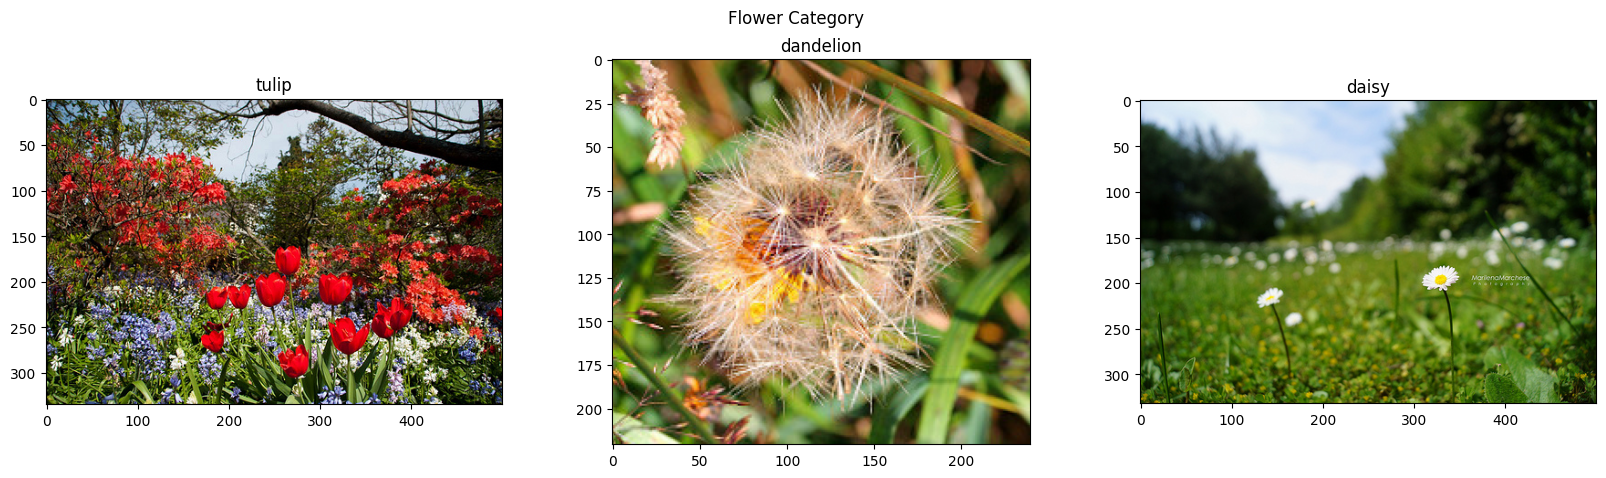

In [84]:
# checking samples
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Flower Category')
tulip_image = img.imread(tulip[0])
dandelion_image = img.imread(dandelion[0])
daisy_image = img.imread(daisy[0])

ax[0].set_title('tulip')
ax[1].set_title('dandelion')
ax[2].set_title('daisy')

ax[0].imshow(tulip_image)
ax[1].imshow(dandelion_image)
ax[2].imshow(daisy_image)

In [85]:
# image and label dictionary
# Contains the images path
df_images = {
    'tulip' : tulip,
    'dandelion' : dandelion,
    'daisy' : daisy,
}

# Contains numerical labels for the categories
df_labels = {
    'tulip' : 0,
    'dandelion' : 1,
    'daisy' : 2,
}

In [86]:
# Splitting in training testing
# x, y = [], []
# for label, images in df_images.items():
#     for image in images:
#         img = cv2.imread(str(image))
#         x.append(img) 
#         y.append(df_labels[label])
x, y = [], [] 
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (28,28)) 
        x.append(resized_img) 
        y.append(df_labels[label])

In [46]:
# import tensorflow as tf
# for i in range(len(x)-1):
#   # x[i] = cv2.resize((x[i]), (224, 224), interpolation = cv2.INTER_AREA)
#   x[i] = tf.image.resize(x[i], [224, 224])

In [89]:
# converting in array format
x = np.array(x)
y = np.array(y)

In [88]:
len(x[71])

28

In [90]:
# Splitting in training testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [91]:
type(x_train[9])

numpy.ndarray

In [32]:
# scale images to [0, 1] range
# x_train = x_train.astype('float32') / 300
# x_train = np.array(x_train, dtype=np.float32)
# x_test = x_test.astype('float32') / 300

In [92]:
# additional 1 for computution using convolution
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [93]:
# converting labels into categorical (same as one hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [94]:
# data parameters
num_classes = 3
input_shape = (28, 28, 3)

In [95]:
# build model
model = keras.Sequential(
    [
        # input layer
        layers.Input(shape=input_shape),
        # convolution layer
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        # pooling layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # flatten the convolution made to convert it into neural n/w
        layers.Flatten(),
        # dropping 50% data
        layers.Dropout(0.5),
        # output layer
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

In [98]:
# training model
batch_size = 128
epochs =20

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
10/10 [==============================] - 2s 140ms/step - loss: 0.9245 - acc: 0.5844 - val_loss: 1.2542 - val_acc: 0.4741
Epoch 2/20
10/10 [==============================] - 2s 164ms/step - loss: 0.8546 - acc: 0.6074 - val_loss: 1.0875 - val_acc: 0.5926
Epoch 3/20
10/10 [==============================] - 2s 217ms/step - loss: 0.8096 - acc: 0.6255 - val_loss: 1.0340 - val_acc: 0.6296
Epoch 4/20
10/10 [==============================] - 2s 203ms/step - loss: 0.7637 - acc: 0.6576 - val_loss: 1.1117 - val_acc: 0.5926
Epoch 5/20
10/10 [==============================] - 2s 203ms/step - loss: 0.7402 - acc: 0.6872 - val_loss: 1.2166 - val_acc: 0.5185
Epoch 6/20
10/10 [==============================] - 1s 115ms/step - loss: 0.7487 - acc: 0.6551 - val_loss: 1.1516 - val_acc: 0.5630
Epoch 7/20
10/10 [==============================] - 1s 112ms/step - loss: 0.6877 - acc: 0.6807 - val_loss: 1.0911 - val_acc: 0.6074
Epoch 8/20
10/10 [==============================] - 1s 115ms/step - loss: 0.

In [99]:
score = model.evaluate(x_test , y_test , verbose=0)

print("Test loss : ",score[0])
print("Test accuracy : ",score[1])

Test loss :  0.848147451877594
Test accuracy :  0.7133333086967468
